In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings(action='ignore')

data_path = '/content/drive/MyDrive/data/'

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
test_df = pd.read_csv(os.path.join(data_path, 'test_category_property.csv')) # 전체 테스트 데이터

In [ ]:
test_df.head()

,Unnamed: 0,Unnamed: 0.1,user_id,menu,menu_id,timestamp,category,property
0,0,0,0,함박스테이크,128,2,양식,고기류
1,1,1,0,컵라면&찐계란,512,3,한식,면류
2,2,2,0,시리얼과일샐러드,1200,5,한식,샐러드류
3,3,3,0,돼지고기장조림,866,8,한식,조림류
4,4,4,0,돈까스,695,9,일식,튀김류


# 유저 & 메뉴 확인

Text(0.5, 1.0, 'user sequence length')

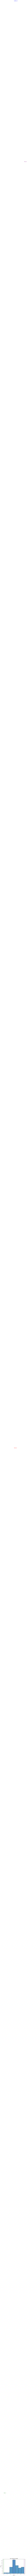

In [ ]:
# user sequence 길이
def get_show(title, val, col, x):
    plt.axvline(x = val, color=col)
    plt.text(val, x, f'{title}_{val}', color = col, fontsize=12)

sns.histplot(test_df["user_id"].value_counts())

mean_val = test_df["user_id"].value_counts().mean()
median_val = test_df["user_id"].value_counts().median()
min_val = test_df["user_id"].value_counts().min()
max_val = test_df["user_id"].value_counts().max()

get_show(title = 'mean', val = int(mean_val), col = 'r', x = 1400)
get_show(title = 'median', val = int(median_val), col = 'b', x = 3200)
get_show(title = 'min', val = int(min_val), col = 'g', x = 100)
get_show(title = 'max', val = int(max_val), col = 'purple', x = 3000)

plt.title('user sequence length')

In [ ]:
# User, Menu 갯수 확인
num_test_users = test_df['user_id'].nunique()
num_test_items = test_df['menu'].nunique()

print ("Number of test Menu:", len(test_df['menu']))
print ("Number of unique test Menu: ", num_test_items)
print ("Number of unique test users: ", num_test_users)
print("Data sparsity ratio: ", 1 - len(test_df) / (num_test_users * num_test_items))

Number of test Menu: 347
Number of unique test Menu:  143
Number of unique test users:  52
Data sparsity ratio:  0.9533351264120495


In [ ]:
# 중복되는 Menu 데이터 확인
test_df['menu'].value_counts()

닭가슴살장조림           12
미니햄버거             12
시리얼과일샐러드          11
김밥                11
컵라면&찐계란           11
                  ..
(New)당근크림치즈베이글     1
두부구이               1
짜장면                1
소보루빵               1
삼계탕                1
Name: menu, Length: 143, dtype: int64

In [ ]:
# 중복 메뉴 상위 15개
from collections import Counter
n = 15
c= Counter(test_df['menu'])
print(f"자주 나오는 메뉴 상위 {n}개 \n")
print("   메뉴    |   중복 횟수")
for x,y in c.most_common(n):
    print(x, "\t", y)

자주 나오는 메뉴 상위 15개 

   메뉴    |   중복 횟수
미니햄버거 	 12
닭가슴살장조림 	 12
컵라면&찐계란 	 11
시리얼과일샐러드 	 11
김밥 	 11
돈까스 	 10
알리오올리오파스타 	 10
된장찌개 	 7
브리또 	 7
김치찌개 	 7
유부초밥 	 7
샌드위치 	 7
떡볶이 	 6
삼겹살구이 	 6
치킨 	 6


In [ ]:
value = test_df['menu'].value_counts()
value = value.to_frame()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

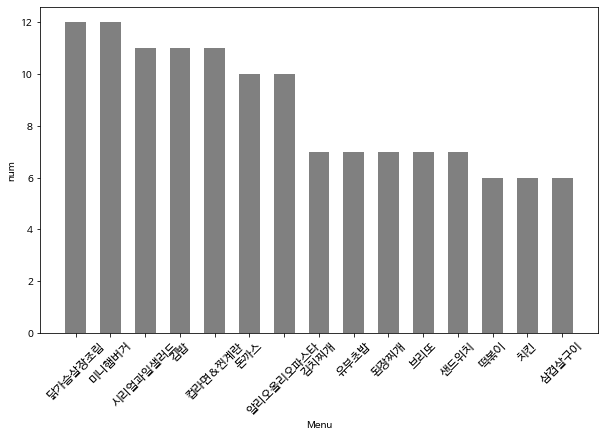

In [ ]:
xs=value.index.to_list()		
ys=value['menu'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Menu')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(rotation=45, fontsize = 12)

- 전체 데이터 수는 134154개
- 전체 유저 수는 4518명
- 유저마다 session 길이 28~30
- 전체 메뉴 수는 2340개
- 메뉴마다 최소 9개에서 최대 4014번 중복

# category 및 property 확인

In [ ]:
num_test_ctg = test_df['category'].nunique()
num_test_pp = test_df['property'].nunique()

print ("Number of unique category: ", num_test_ctg)
print ("Number of unique property: ", num_test_pp)

Number of unique category:  4
Number of unique property:  17


In [ ]:
# 중복되는 category 데이터 확인
test_df['category'].value_counts()

한식    221
양식     91
일식     23
중식     12
Name: category, dtype: int64

In [ ]:
# 중복되는 property 데이터 확인
test_df['property'].value_counts()

면류        51
패스트푸드류    50
밥류        38
고기류       37
빵류        27
샐러드류      25
찌개류       23
조림류       23
튀김류       17
탕류        14
국류        12
찜류        11
볶음류        8
구이류        7
디저트류       2
무침류        1
전류         1
Name: property, dtype: int64

In [ ]:
221/len(test_df)

0.6368876080691642

In [ ]:
51/347

0.14697406340057637

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

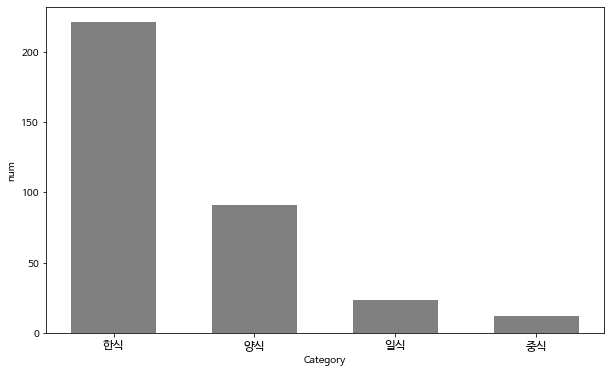

In [ ]:
# 카테고리 시각화
value = test_df['category'].value_counts()
value = value.to_frame()

xs=value.index.to_list()		
ys=value['category'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Category')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(fontsize = 12)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

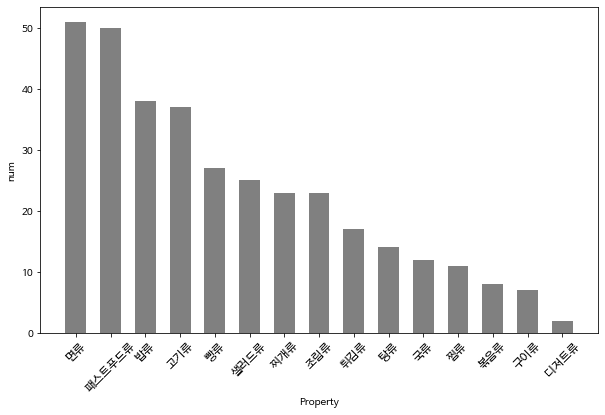

In [ ]:
# 속성 시각화
value = test_df['property'].value_counts()
value = value.to_frame()

xs=value.index.to_list()		
ys=value['property'].to_list()			

plt.figure(figsize=(10, 6))			
plt.xlabel('Property')			
plt.ylabel('num')				

plt.bar(xs[0:15], ys[0:15], width=0.6, color = 'gray')
plt.xticks(rotation = 45, fontsize = 12)